In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

In [3]:
df = pd.read_csv("/kaggle/input/bank-marketing/Bank Marketing.csv")
df.tail(30)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
45181,45182,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,1
45182,45183,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,2
45183,45184,70,retired,married,primary,no,324,no,no,cellular,15,nov,78,1,96,7,success,1
45184,45185,63,retired,married,secondary,no,1495,no,no,cellular,16,nov,138,1,22,5,success,1
45185,45186,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,2
45186,45187,59,unknown,married,unknown,no,1500,no,no,cellular,16,nov,280,1,104,2,failure,1
45187,45188,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,2
45188,45189,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,2
45189,45190,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,1
45190,45191,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,2


1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Data Explore

In [4]:
df.shape

(45211, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45211 non-null  int64 
 1   V1      45211 non-null  int64 
 2   V2      45211 non-null  object
 3   V3      45211 non-null  object
 4   V4      45211 non-null  object
 5   V5      45211 non-null  object
 6   V6      45211 non-null  int64 
 7   V7      45211 non-null  object
 8   V8      45211 non-null  object
 9   V9      45211 non-null  object
 10  V10     45211 non-null  int64 
 11  V11     45211 non-null  object
 12  V12     45211 non-null  int64 
 13  V13     45211 non-null  int64 
 14  V14     45211 non-null  int64 
 15  V15     45211 non-null  int64 
 16  V16     45211 non-null  object
 17  Class   45211 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 6.2+ MB


In [6]:
df.describe()

,id,V1,V6,V10,V12,V13,V14,V15,Class
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


## Check Missing Value

In [7]:
df.isna().sum()

id       0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
Class    0
dtype: int64

## Rename Columns

In [8]:
df = df.rename({'id':'no', 'V1':'age', 'V2':'job', 'V3':'marital', 'V4':'Education', 'V5':'default', 'V6':'balance', 'V7':'housing',
               'V8':'loan', 'V9':'campaigncontact', 'V10':'day', 'V11':'month', 'V12':'duration', 'V13':'totalcall', 'V14':'pdays', 'V15':'previous', 'V16':'poutcome', 'Class':'Class'}, axis=1)
df.head()

,no,age,job,marital,Education,default,balance,housing,loan,campaigncontact,day,month,duration,totalcall,pdays,previous,poutcome,Class
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


## Dataset Insight Analysis

#### Top 5 Job that do subscribe after the campaign

In [9]:
top_job = df.groupby('job')['Class'].apply(lambda x: (x == 1).sum()).reset_index(name='subscribe')

<Axes: xlabel='job'>

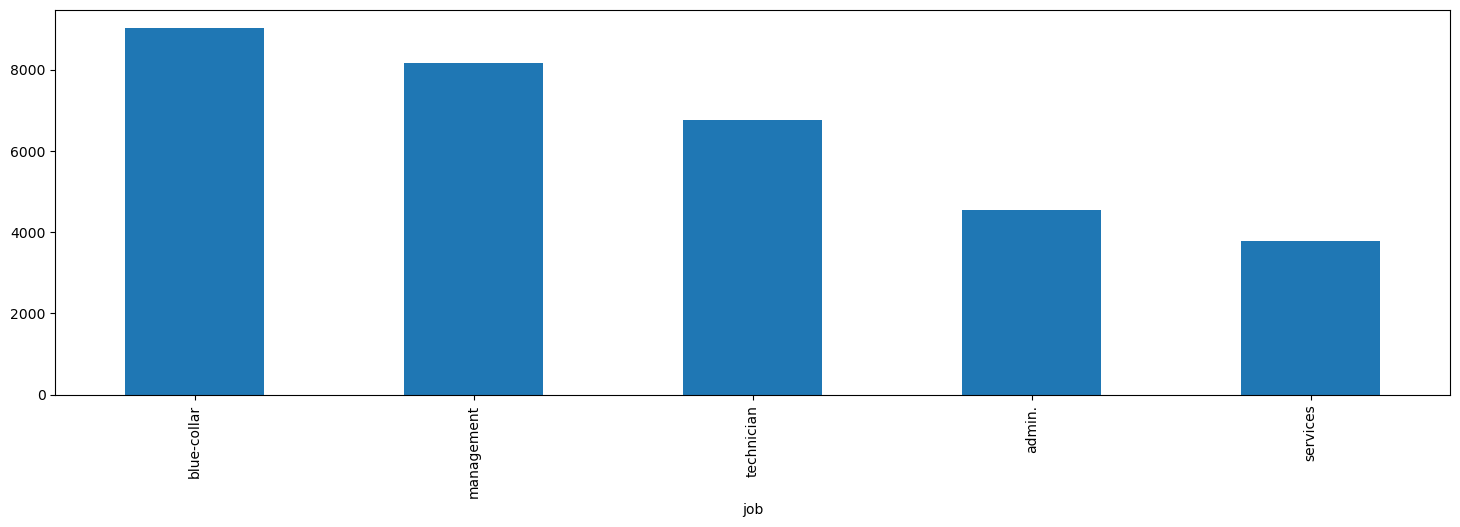

In [10]:
top_job[['job','subscribe']].groupby(['job'])['subscribe'].sum().nlargest().plot.bar(figsize=(18,5))

#### Average Duration of Campaign Call

In [11]:
dur = df[df['Class']==1]['duration'].mean()
dur.round()

221.0

Dapat diambil insight dari hasil perhitungan rata-rata durasi Campaign menggunakan metode panggilan dengan hasil akhir pengguna yang dipanggil telah subscribe ke deposit yang ditawarkan melalui telephone adalah 221 detik atau 3 menit 41 detik. Durasi waktu ini dapat menjadi pertimbangan ketika melakukan panggilan, campaign dapat dilakukan menggunakan metode elevator speech dengan pitch awal yang menarik sehingga pelanggan terpancing untuk mendengarkan tawaran 

#### Subscriber per Month

In [12]:
df.head()

,no,age,job,marital,Education,default,balance,housing,loan,campaigncontact,day,month,duration,totalcall,pdays,previous,poutcome,Class
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   no               45211 non-null  int64 
 1   age              45211 non-null  int64 
 2   job              45211 non-null  object
 3   marital          45211 non-null  object
 4   Education        45211 non-null  object
 5   default          45211 non-null  object
 6   balance          45211 non-null  int64 
 7   housing          45211 non-null  object
 8   loan             45211 non-null  object
 9   campaigncontact  45211 non-null  object
 10  day              45211 non-null  int64 
 11  month            45211 non-null  object
 12  duration         45211 non-null  int64 
 13  totalcall        45211 non-null  int64 
 14  pdays            45211 non-null  int64 
 15  previous         45211 non-null  int64 
 16  poutcome         45211 non-null  object
 17  Class            45211 non-null

In [14]:
df['month'] = pd.to_datetime(df['month'], format='%b')

In [16]:
df['month'] = df['month'].dt.strftime("%B")

In [17]:
df.head()

,no,age,job,marital,Education,default,balance,housing,loan,campaigncontact,day,month,duration,totalcall,pdays,previous,poutcome,Class
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,May,261,1,-1,0,unknown,1
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,May,151,1,-1,0,unknown,1
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,May,76,1,-1,0,unknown,1
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,May,92,1,-1,0,unknown,1
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,May,198,1,-1,0,unknown,1


In [46]:
month = df['month'].unique()
month

array(['May', 'June', 'July', 'August', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'September'], dtype=object)

In [18]:
top_month = df.groupby('month')['Class'].apply(lambda x: (x == 1).sum()).reset_index(name='subscribe')
top_month

,month,subscribe
0,April,2355
1,August,5559
2,December,114
3,February,2208
4,January,1261
5,July,6268
6,June,4795
7,March,229
8,May,12841
9,November,3567


mapping_month= {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
top_month['month'] = top_month['month'].map(mapping_month)

In [22]:
top_month['month'] = top_month['month'].apply(lambda x: dt.datetime.strptime(x, '%B').strftime('%B'))

In [25]:
top_month['month'] = pd.Categorical(top_month['month'], categories=list(calendar.month_name[1:]), ordered=True)
top_month = top_month.sort_values('month')

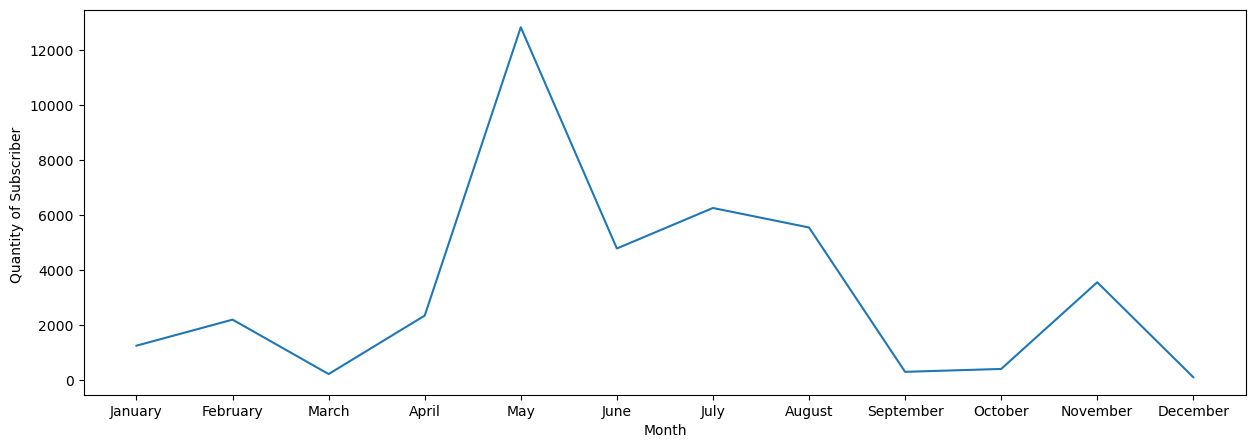

In [56]:
plt.figure(figsize = (15, 5))
plt.plot(top_month['month'], top_month['subscribe'])
plt.xlabel("Month", fontsize = 10)
plt.ylabel("Quantity of Subscriber ", fontsize = 10)
plt.show()

Dengan grafik yang didapat, kita bisa melihat paling banyak orang melakukan subscribe ke term deposit adalah di bulan May. Ini merupakan salah satu customer behaviour yang bisa menjadi pertimbangan untuk meletakkan lebih banyak penawaran di bulan yang May dan melakukan imrovisasi beberapa bulan lainnya dengan mempertimbangkan aspek lainnya agar mengalami penaikan subscriber

#### Call Marketing Effectiveness

In [36]:
uval = df['poutcome'].unique()
uval

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [42]:
countp = df['poutcome'].value_counts()
countp

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

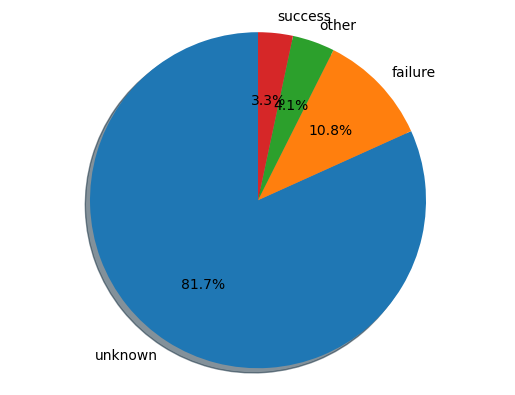

In [44]:
labels = uval
sizes = countp

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Pie Chart dari hasil marketing melalui panggilan menunjukkan sebesar 81.7% tidak diketahui kesuksesannya, 10.8% gagal, 4.1% lainnya dan 3.3% sukses. Melihat persentase keseluruhan dari data, persentase kesuksesan dari marketing metode panggilan ini adalah persentase paling kecil yang menandakan marketing metode ini sangat tidak dianjurkan untuk dilakukan secara berkala ke depannya. Untuk menangani hal ini ada beberapa hal yang bisa dilakukan untuk mencapai marketing bank yang lebih efektif antara lain:
* Mengikuti ombak trend di sosial media
* Melihat peluang pengguna platform sosmed mana yang paling digemari
* Melakukan soft selling
* Membangun brand awareness melalui menyesuaikan dengan trend yang sedang naik

## Conclusion

##### * 3 subscriber teratas memiliki pekerjaan Blue-Collar, Management dan Technician
##### * Rata-rata panggilan yang dilakukan dan berhasil melakukan subscribe adalah dengan durasi waktu 221 detik atau 3 menit 41 detik
##### * Paling banyak orang melakukan subscribe ke term deposit adalah di bulan May
##### * Persentase kesuksesan dari marketing metode panggilan ini merupakan persentase yang paling kecil yaitu hanya sebesar 3.3% atau hanya sebanyak 1551 orang yang berhasil menerima marketing via panggilan ini